In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
FIG_SIZE = (16,8)


In [3]:
example_file = "disco.00001.au"

In [4]:
#loading audio file with librosa
signal, sample_rate = librosa.load(example_file)

In [5]:
max_time = signal.size/(sample_rate)
print(max_time)

30.211337868480726


In [6]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [7]:
print(sample_rate)

22050


C:\Users\peter\AppData\Local\Temp\ipykernel_18384\1631616977.py:3: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sample_rate*2, alpha = 0.5)


Text(0.5, 1.0, 'Waveform')

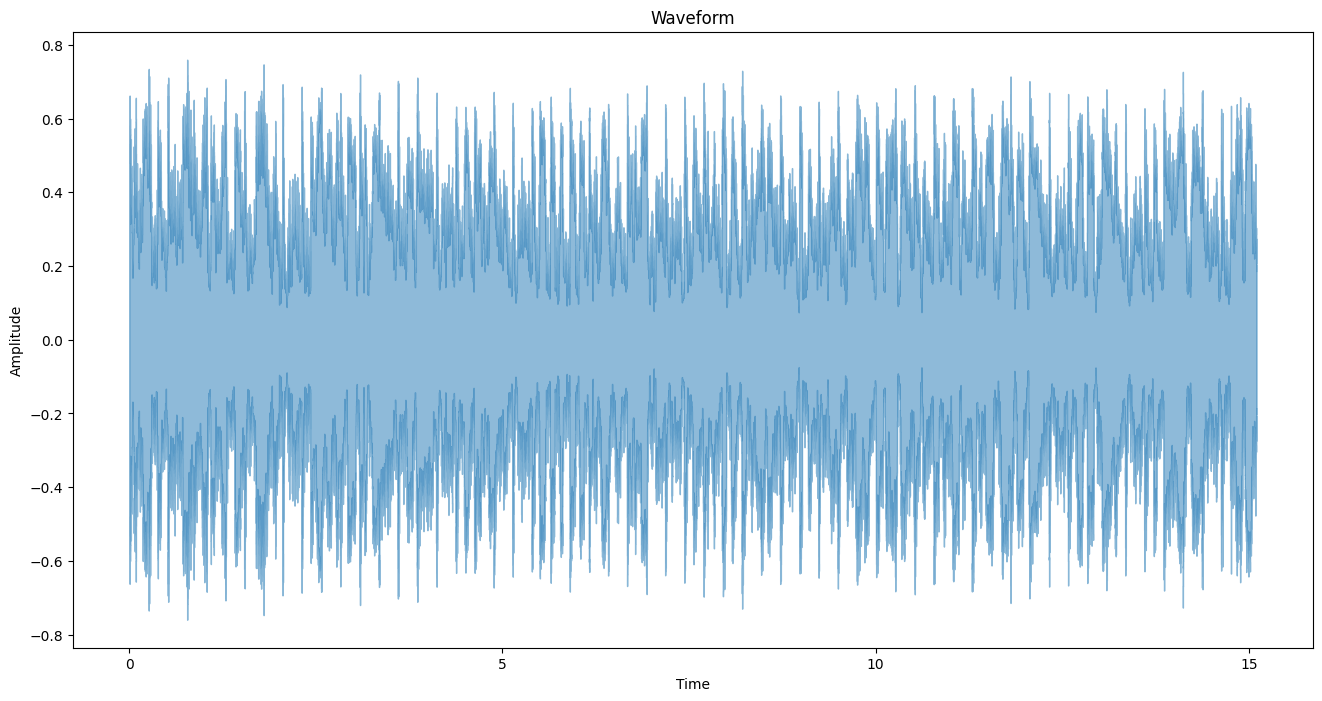

In [8]:
#WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate*2, alpha = 0.5)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Waveform")

# FOURIER TRANSFORM:

A Fourier Transform is a mathematical technique that converts a signal 
or function from the time domain to the frequency domain. It decomposes a 
complex waveform into its individual frequency components, which makes it 
easier to analyze and understand its properties. The Fourier Transform is 
widely used in various fields, including signal processing, communication 
systems, physics, and mathematics

In [9]:
#FOURIER TRANSFORM:

fft = np.fft.fft(signal)

In [10]:
#Calculate the magnitude (abs values on complex numbers)
spectrum = np.abs(fft)


In [11]:
#recreate frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# Power Spectrum:

A power spectrum is a plot or representation of the power of a signal as a 
function of frequency. It shows the distribution of power over the different 
frequencies that make up a signal, and can reveal important information about 
the signal's characteristics. The power spectrum is obtained by taking the 
magnitude squared of the Fourier transform of the signal. It is widely used in 
many fields to analyze and visualize signals, and to design and optimize signal
 processing and communication systems.

Text(0.5, 1.0, 'Power Spectrum')

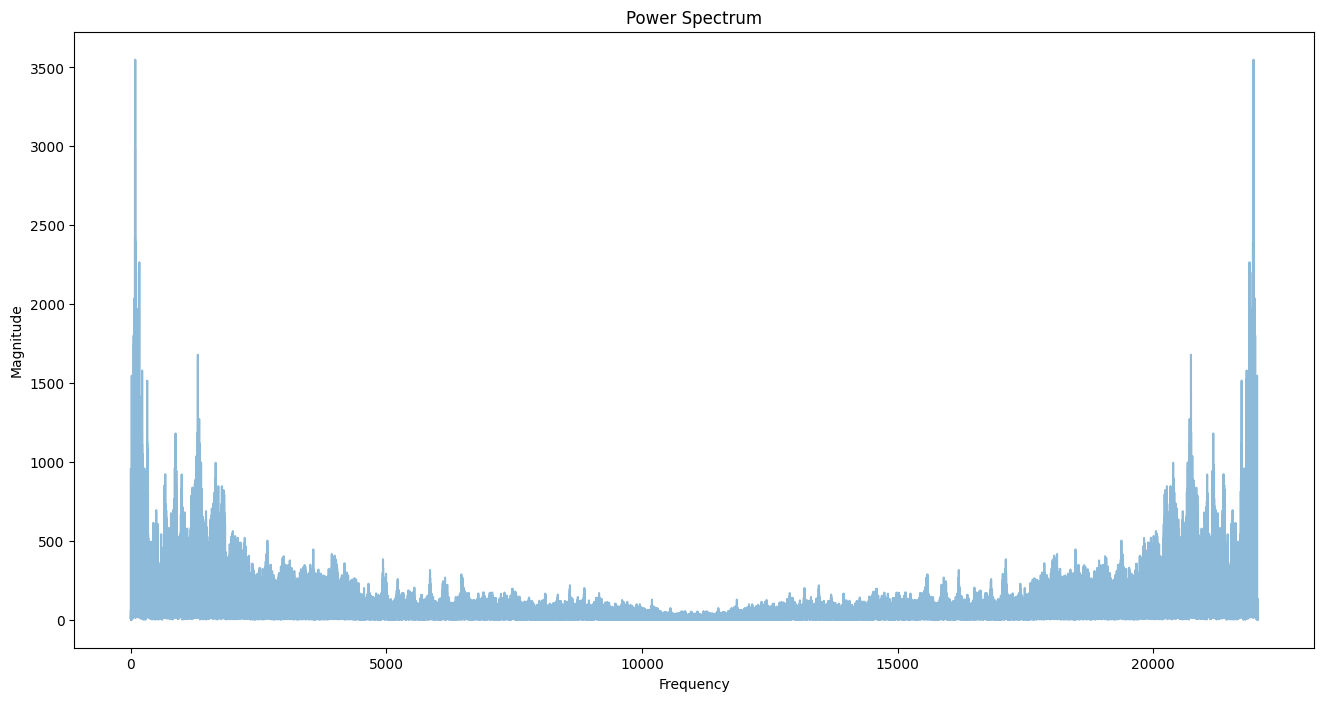

In [12]:
#Power Spectrum

plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha = 0.5)
plt.ylabel("Magnitude")
plt.xlabel("Frequency")
plt.title("Power Spectrum")

Text(0.5, 1.0, 'Power Spectrum')

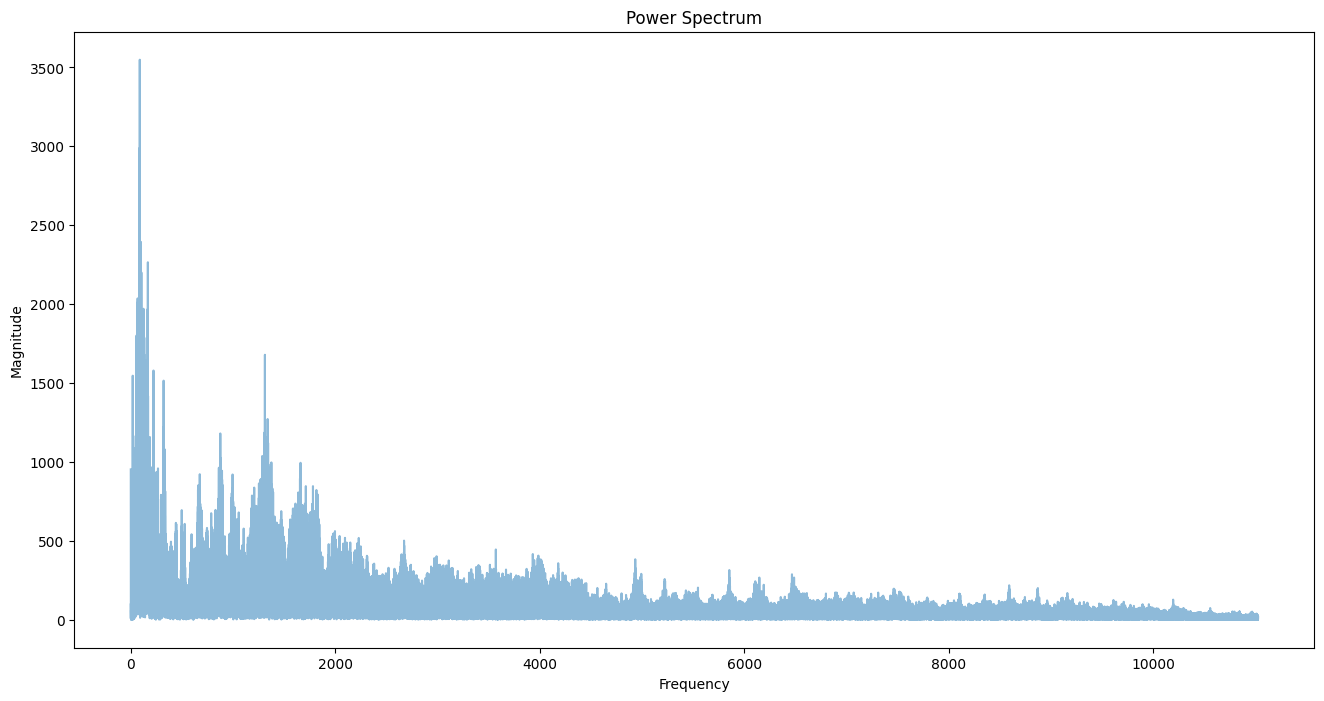

In [13]:
# Due to the Power spectrum being symetricasl we only need half.
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

#Then we can plot this new graph:
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha = 0.5)
plt.ylabel("Magnitude")
plt.xlabel("Frequency")
plt.title("Power Spectrum")

# SHORT TIME FOURIER TRANSFORM

STFT stands for Short-Time Fourier Transform, which is a signal processing technique used to analyze how the frequency content of a signal changes over time.
In a STFT, a signal is divided into small segments (called windows) and the Fourier transform is applied to each segment. This results in a time-frequency representation of the signal,

In [14]:
# spectrogram (STFT)

hop_length = 512 # number of samples 
n_fft = 2048 # number of samples for window 



In [15]:
# Perform STFT
stft = librosa.stft(signal, n_fft = n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

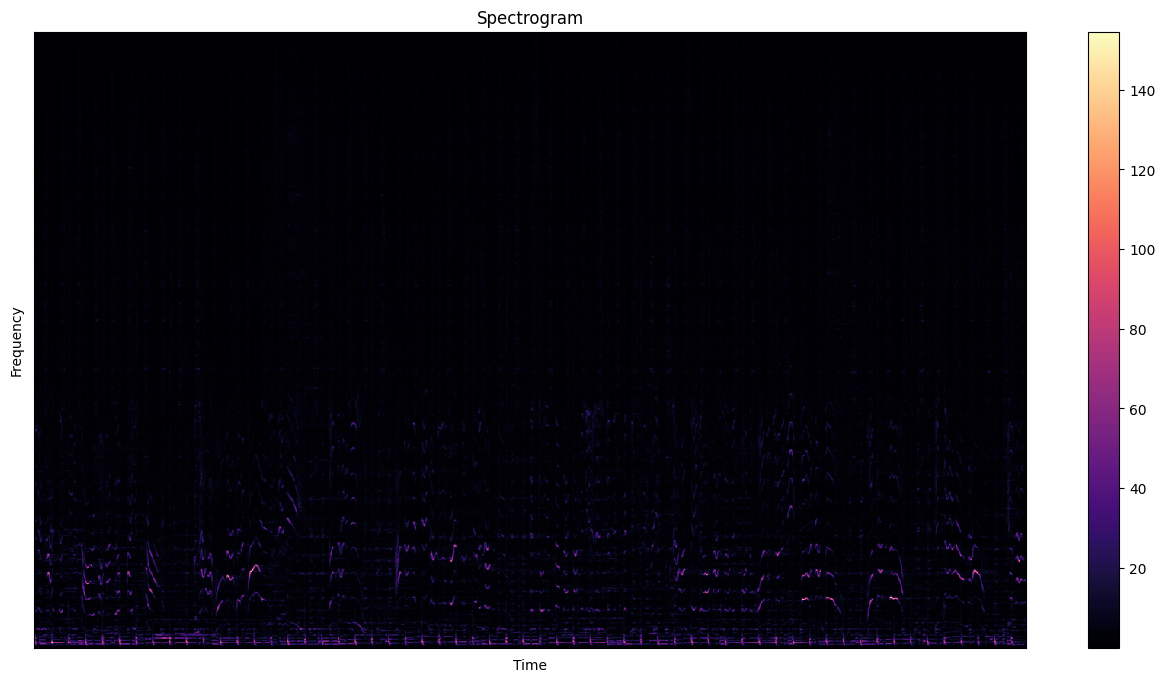

In [16]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

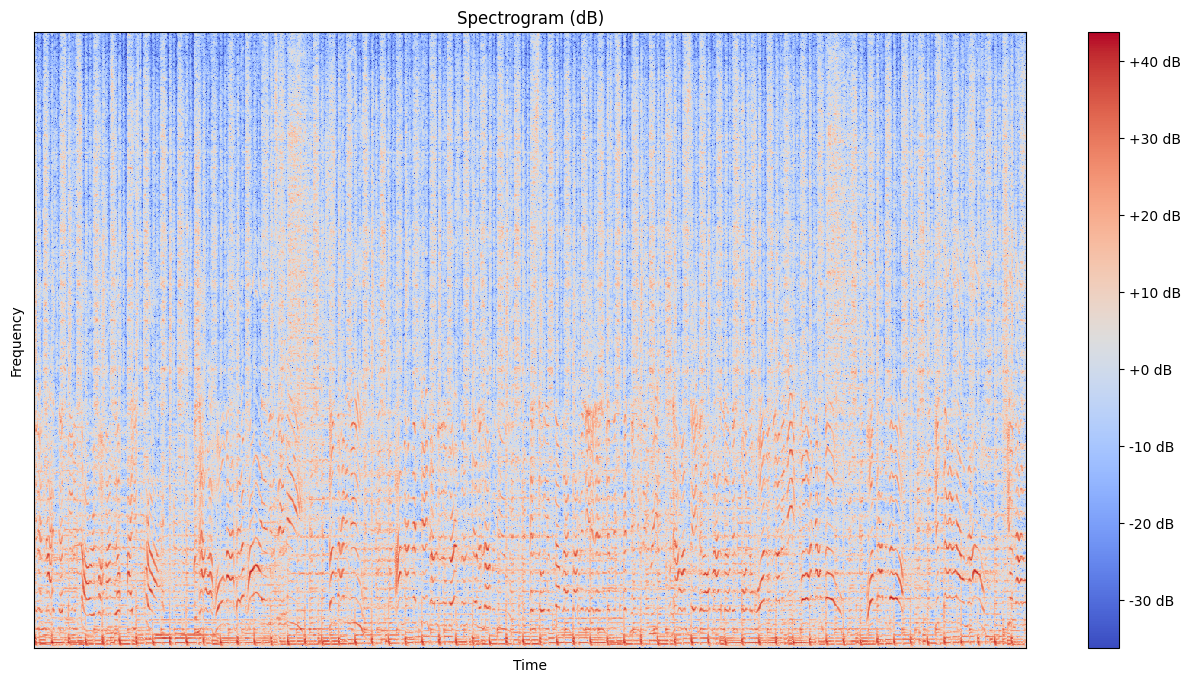

In [17]:
# apply logarithm to get values in decibels 
log_spectrogram = librosa.amplitude_to_db(spectrogram)

#output graph:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format = "%+2.0f dB")
plt.title("Spectrogram (dB)")

# MEL FREQUENCY CEPSTRAL COEFFICIENTS:
The Mel Frequency Cepstral Coefficient is a widely used feature extraction technique in speech and audio signal processing. MFCCs are derived from the Short-Time Fourier Transform (STFT) of a signal and represent a compact and efficient way to characterize the spectral envelope of a signal.

To compute MFCCs, the STFT of a signal is first computed, and then the power spectrum is computed by taking the square of the magnitude of each frequency bin. The Mel scale is then applied to the power spectrum, which compresses the frequency axis to better match the human auditory system's perception of sound. The mel-scaled power spectrum is then converted to the logarithmic scale, and the Discrete Cosine Transform (DCT) is applied to the log-mel spectrum to obtain the MFCCs.

MFCCs are widely used as features for speech and audio signal processing tasks such as speech recognition, speaker identification, and music genre classification, among others.

In [18]:
# MFCC
MFCC = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

C:\Users\peter\AppData\Local\Temp\ipykernel_18384\885610033.py:2: FutureWarning: Pass y=[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCC = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


Text(0.5, 1.0, 'MFCCs')

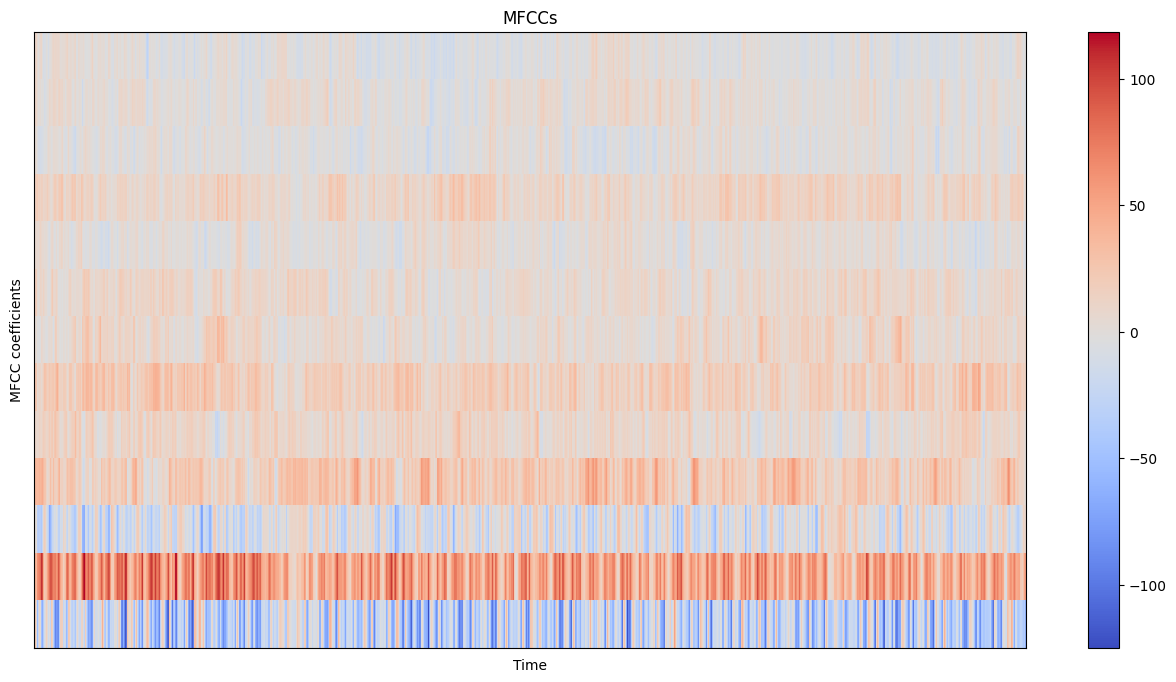

In [19]:
#plot mfcc
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCC, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# Processing all audio files

Now we have worked out what type of spectogram we want to pass into the CNN, lets create this spectrogram for all the audio files.

In [20]:
import json, os, math


In [21]:
DATASET_PATH = "data\genres"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION



In [25]:
# Function to create MFCC for all audio samples:

def create_mfcc(DATASET_PATH, JSON_PATH, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    # dictionary to store mapping labels and MFCCs
    data_dict = {
        "mapping" :[],
        "labels":[],
        "mfcc":[]
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # iterate through each genre folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
        # check if were in a genre folder
        if dirpath is not DATASET_PATH:

            # save genres label in the dictionary map
            semantic_label = dirpath.split("/")[-1]
            data_dict["mapping"].append(semantic_label)
            print(f"Processing: {semantic_label.upper()} ")

            # Once in genre sub - folder, iterate through each audio sample:
            for f in filenames:
                # load the audio file 
                file_path = os.path.join(dirpath, f)
                signal, sample_rate, = librosa.load(file_path, sr = SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for the current sample:
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    #extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expoected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data_dict["mfcc"].append(mfcc.tolist())
                        data_dict["labels"].append(i-1)
                        print(f"{file_path}, segment: {d+1}")
    
    # save MFCCs to json file

    with open(JSON_PATH, "w") as fp:
        json.dump(data_dict, fp, indent=4)




In [ ]:
create_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)